In [1]:
# https://towardsdatascience.com/choosing-the-correct-error-metric-mape-vs-smape-5328dec53fac
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# def mape(y_true, y_pred):
#     return mean_absolute_error(y_true, y_pred) * 100


# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html
# https://stackoverflow.com/questions/47648133/mape-calculation-in-python
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

# https://stackoverflow.com/questions/49604269/run-all-regressors-against-the-data-in-scikit
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, if_plot):
    # fit the model
    model.fit(X_train, y_train)

    # predict the values using training data
    train_pred = model.predict(X_train)

    # evaluate using training data
    train_rmse = rmse(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_mape = mape(y_train, train_pred)
    train_r2 = r2_score(y_train, train_pred)
    
    # print the results of the training data
    print("Training data results\n")
    print("Root Mean Squared Error: {:.2f}\n".format(train_rmse))
    print("Mean Absolute Error: {:.2f}".format(train_mae))
    print("Mean Absolute Percentage Error: {:.2f}\n".format(train_mape))
    print("R Square: {:.2f}\n".format(train_r2))
    
    # predict the values using testing data
    test_pred = model.predict(X_test)

    # evaluate using testing data
    test_rmse = rmse(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_mape = mape(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    
        # print the results of the testing data
    print("Testing data results\n")
    print("Root Mean Squared Error: {:.2f}\n".format(test_rmse))
    print("Mean Absolute Error: {:.2f}\n".format(test_mae))
    print("Mean Absolute Percentage Error: {:.2f}\n".format(test_mape))
    print("R Square: {:.2f}\n".format(test_r2))
    
    if if_plot=="Yes":
        plot_model(y_train,y_test,train_pred,test_pred,model_name)
    else:
        print("No plot")
        
    tree_explained=['EXTR','Gradient Boosting','Random Forest','Light GBM','Xgboost','Catboost']
    
    if model_name in tree_explained:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train)
        shap.summary_plot(shap_values, X_train, plot_type='bar')
        shap.summary_plot(shap_values, X_train)

        shap.initjs()

#         for i in range(len(X_test)):
#             display(shap.force_plot(explainer.expected_value, shap_values[i], features=X_train.loc[i], 
#             feature_names=X_train.columns))
            
    return train_rmse, train_mae, train_mape, train_r2, test_rmse, test_mae, test_mape, test_r2

def plot_model(y_train,y_test,train_pred,test_pred,model_name):
    
    # Assuming you have a list of time points or indices
    time_points_train = range(len(y_train))
    time_points_test = range(len(y_train), len(y_train) + len(y_test))

    # Create a figure and axis for the time series plot
    plt.figure(figsize=(12, 6))

    # Plot training data
    plt.plot(time_points_train, y_train, label='Actual Train Data', color='blue')

    # Plot testing data
    plt.plot(time_points_test, y_test, label='Actual Test Data', color='green')

    # Plot training predictions
    plt.plot(time_points_train, train_pred, label=str(model_name)+' Train Predictions', color='red')

    # Plot testing predictions
    plt.plot(time_points_test, test_pred, label=str(model_name)+' Test Predictions', color='orange')

    # Add labels and legend
    plt.xlabel('Time/Iterations')
    plt.ylabel('Values')
    plt.legend()

    # Set a title for the plot
    plt.title(str(model_name)+' - Train and Test Data vs. Predictions')

    # Show the plot
    plt.grid(True)
    plt.show()
    


def feature_importance(model, X_train, model_name):
    features = X_train.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    # customized number 
    num_features = 25

    plt.figure(figsize=(10,10))
    plt.title('Feature Importances')

    # only plot the customized number of features
    plt.barh(range(num_features), importances[indices[-num_features:]], color='r', align='center')
    plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
    plt.xlabel(str(model_name)+'s Feature Importance')
    plt.show();

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (20,7)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster


In [3]:
## Important
# https://datascience.stackexchange.com/questions/51323/how-to-interpret-metrics-of-a-model-after-scaling-the-data
# https://www.quora.com/When-is-it-necessary-to-normalize-time-series-data-for-predictive-analysis-and-when-is-it-not

In [4]:
timed_df=pd.read_excel("InvoiceData_concate_cleaned_grouped_flu_stock.xlsx")
timed_df.drop('Date', axis = 1,inplace=True)

In [5]:
# train=timed_df[timed_df['reference_date']<'2023-05-01']

In [6]:
# train.shape

In [7]:
# test=timed_df[timed_df['reference_date']>='2023-05-01']

In [8]:
# test.shape

In [9]:
# train.drop('reference_date', axis = 1,inplace=True)
# test.drop('reference_date', axis = 1,inplace=True)

In [10]:
from darts import TimeSeries

In [11]:
timed_df = timed_df.set_index('reference_date')
# timed_df = timed_df.rename(columns={'amount_p$_sum': 'y'})
timed_df = timed_df.asfreq('D')
timed_df = timed_df.sort_index()
timed_df = timed_df.reset_index()
timed_df = timed_df.fillna(0)

In [12]:
timed_df

,reference_date,customer_name_top_Customer 1,customer_name_top_Customer 2,customer_name_top_Customer 3,customer_name_top_Customer 4,customer_name_top_Customer 5,customer_name_top_Customer 6,customer_name_top_Customer 7,customer_name_top_Customer 8,day_Friday,...,Volume_HELX,Volume_IHI,Volume_XLV,Close_HELX,Close_IHI,Close_XLV,Volume_DHR,Volume_TMO,Close_DHR,Close_TMO
0,2021-01-01,1.0,0.0,4.0,0.0,2.0,2.0,1.0,0.0,10.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2021-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2021-01-04,20.0,37.0,113.0,24.0,6.0,9.0,35.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,2021-01-05,47.0,39.0,176.0,15.0,19.0,9.0,67.0,0.0,0.0,...,2.388889,0.656808,0.858277,1.023080,1.014400,1.007260,1.162694,0.921771,1.024817,1.012505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2023-08-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
968,2023-08-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
969,2023-08-28,70.0,20.0,132.0,34.0,22.0,23.0,59.0,3.0,0.0,...,0.666667,1.091704,0.524203,0.685318,0.968407,1.229900,0.703712,0.289452,1.183548,1.161904
970,2023-08-29,66.0,29.0,149.0,19.0,6.0,24.0,15.0,1.0,0.0,...,0.111111,0.629743,0.831565,0.695689,0.985017,1.240937,0.646578,0.581607,1.194863,1.183685


In [13]:
series = TimeSeries.from_dataframe(timed_df,"reference_date","amount_p$_sum")


In [14]:
train, val = series[:-90], series[-90:]

In [30]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

C:\Users\badre\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


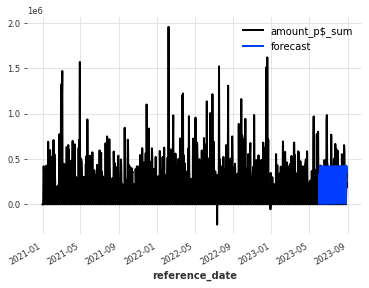

In [31]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [33]:
from darts.metrics import mape


In [34]:
error_mape = mape(
                y_true = val,
                y_pred = prediction
            )

print(f"Test error (mape): {error_mape}")

IndexError: tuple index out of range

Train dates : 2021-01-01 00:00:00 --- 2023-06-01 00:00:00  (n=882)
Test dates  : 2023-06-02 00:00:00 --- 2023-08-30 00:00:00  (n=90)


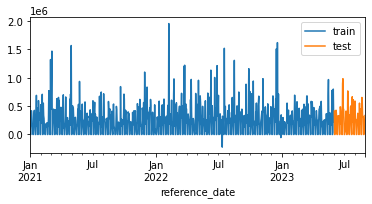

In [13]:
steps = 90
data_train = timed_df[:-steps]
data_test  = timed_df[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax = plt.subplots(figsize=(6, 2.5))
data_train['amount_p$_sum'].plot(ax=ax, label='train')
data_test['amount_p$_sum'].plot(ax=ax, label='test')
ax.legend();